# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
# Import essential libraries
import zipfile
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

/Users/gauravsahoo/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Load the dataset.

In [3]:
# Load and unzip the dataset
datazip_path = 'data.zip'

with zipfile.ZipFile(datazip_path, 'r') as zip_ref:
    zip_ref.extractall()

data_dir = 'data'

# Check if the dataset is loaded successfully
if os.path.exists(data_dir):
    print("Dataset loaded successfully.")
else:
    print("Dataset not found.")

Dataset loaded successfully.


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [4]:
# Create a function to load the raw images
def load_raw_image(image_path):
    image = Image.open(image_path)
    return image

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [5]:
# Get the images and their labels
images = []
labels = []
for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    for image in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image)
        images.append(load_raw_image(image_path))
        labels.append(label)

print(f"Loaded {len(images)} images with {len(set(labels))} unique labels.")
print(f"Unique labels: {set(labels)}")

Loaded 7625 images with 7 unique labels.
Unique labels: {'Other', 'Plastic', 'Metal', 'Paper', 'Glass', 'Cardboard', 'Food_Waste'}


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

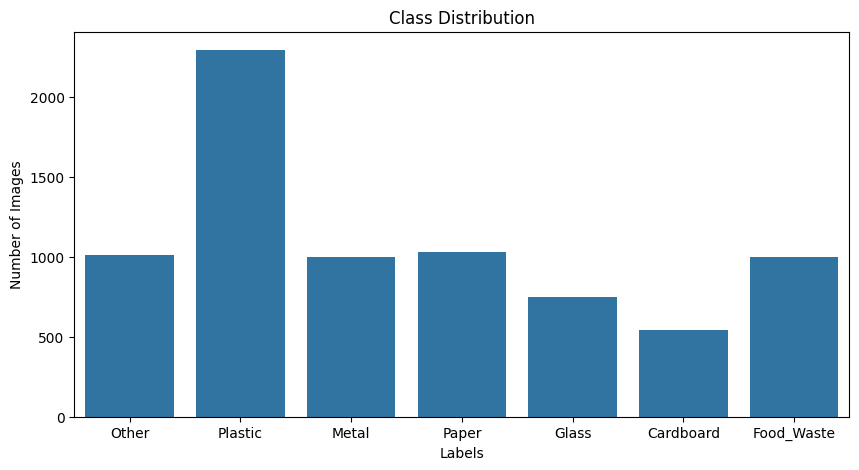

In [6]:
# Visualise Data Distribution
unique_labels = list(set(labels))
num_images = [labels.count(label) for label in unique_labels]
plt.figure(figsize=(10, 5))
sns.barplot(x=unique_labels, y=num_images)
plt.xlabel('Labels')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()

From the bar plot, we can observe that cardboard waste has the lowest number of images, while plastic waste has the highest number of images.

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

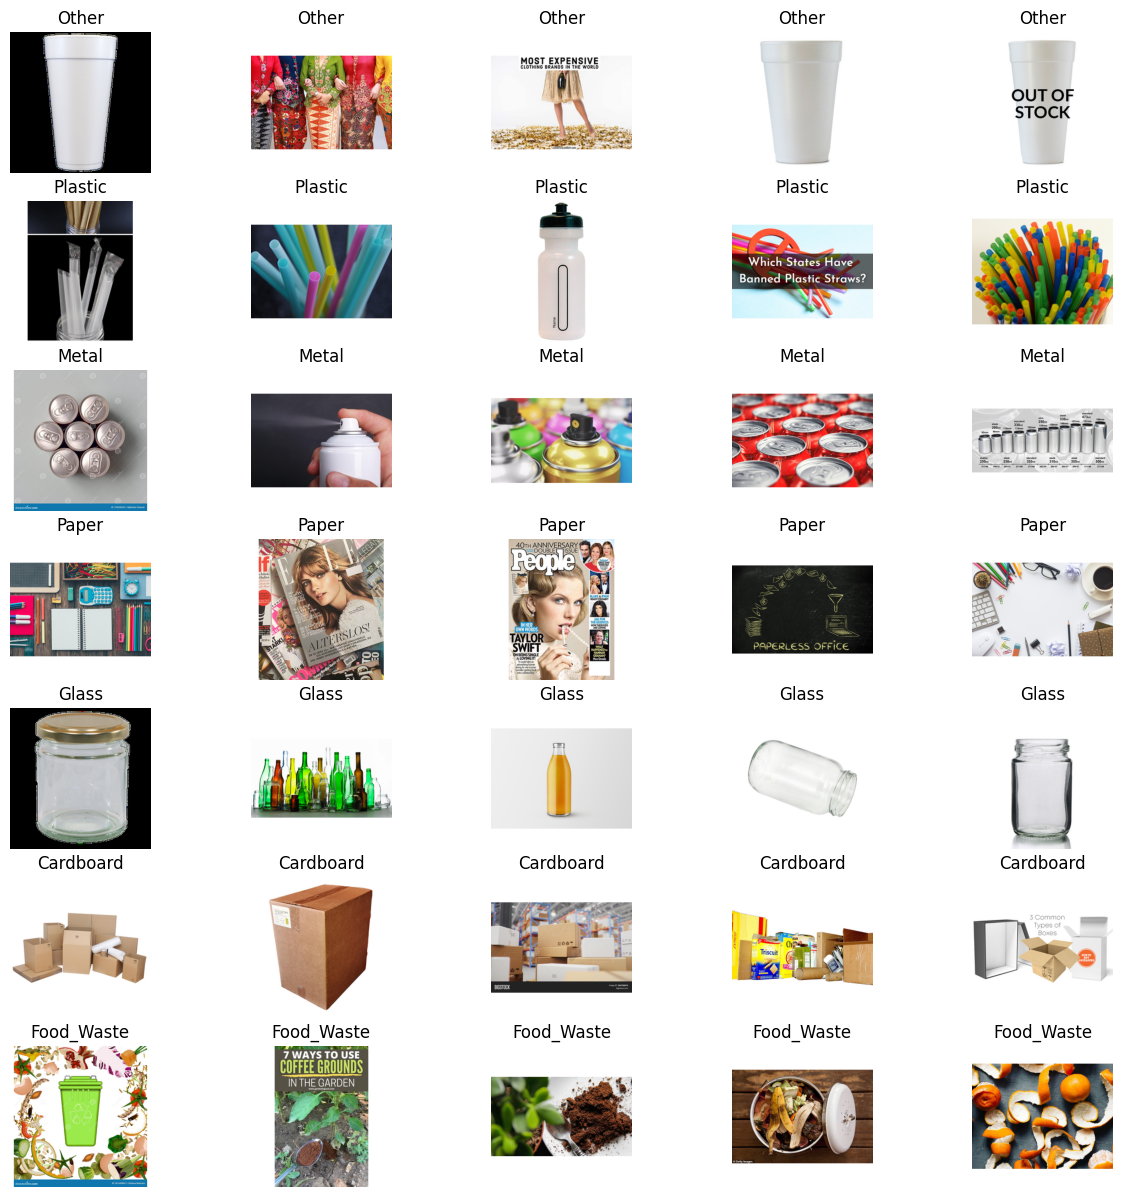

In [7]:
# Visualise Sample Images (across different labels)
num_samples = 5
plt.figure(figsize=(15, 15))
for i, unique_label in enumerate(set(labels)):
    label_images = [image for image, label in zip(images, labels) if label == unique_label]
    for j in range(num_samples):
        index = i * num_samples + j + 1
        plt.subplot(len(unique_labels), num_samples, index)
        plt.imshow(label_images[j])
        plt.title(unique_label)
        plt.axis('off')
plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [8]:
# Find the smallest and largest image dimensions from the data set
min_height = float('inf')
min_width = float('inf')
max_height = float('-inf')
max_width = float('-inf')
for image in images:
    width, height = image.size
    min_height = min(min_height, height)
    min_width = min(min_width, width)
    max_height = max(max_height, height)
    max_width = max(max_width, width)
print(f"Smallest image dimensions: {min_width}x{min_height}")
print(f"Largest image dimensions: {max_width}x{max_height}")

Smallest image dimensions: 256x256
Largest image dimensions: 256x256


Since all the images are 256x256 in size, we’ll scale them down to 128x128 to speed up the training process.

In [9]:
# Resize the image dimensions
resized_images = [image.resize((128, 128)) for image in images]

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

#### **2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [10]:
# Encode the labels suitably
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
print(f"Encoded labels: {encoded_labels}")

Encoded labels: [5 5 5 ... 6 6 6]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [11]:
# Assign specified parts of the dataset to train and validation sets
X_train, X_val, y_train, y_val = train_test_split(resized_images, encoded_labels, test_size=0.3, random_state=100)
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")

# Convert the images to numpy arrays
X_train = np.array([np.array(image) for image in X_train])
X_val = np.array([np.array(image) for image in X_val])

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val dtype: {y_val.shape}")

Training set size: 5337
Validation set size: 2288
X_train shape: (5337, 128, 128, 3)
X_val shape: (2288, 128, 128, 3)
y_train shape: (5337,)
y_val dtype: (2288,)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

**Creating 9 different models:**
1.	32_32_32_base – 3 conv layers with 32 filters, kernel size 3x3, pool size 2x2, ReLU activation, without dropout or batch normalization.

2.	32_32_32_dropout – 3 conv layers with 32 filters, kernel size 3x3, pool size 2x2, ReLU activation, with dropout.

3.	32_32_32_batchnorm – 3 conv layers with 32 filters, kernel size 3x3, pool size 2x2, ReLU activation, with batch normalization.

4.	64_64_64_base – 3 conv layers with 64 filters, kernel size 3x3, pool size 2x2, ReLU activation, without dropout or batch normalization.

5.	64_64_64_dropout – 3 conv layers with 64 filters, kernel size 3x3, pool size 2x2, ReLU activation, with dropout.

6.	64_64_64_batchnorm – 3 conv layers with 64 filters, kernel size 3x3, pool size 2x2, ReLU activation, with batch normalization.

7.	32_64_128_base – 3 conv layers with 32, 64, 128 filters, kernel size 3x3, pool size 2x2, ReLU activation, without dropout or batch normalization.

8.	32_64_128_dropout – 3 conv layers with 32, 64, 128 filters, kernel size 3x3, pool size 2x2, ReLU activation, with dropout.

9.	32_64_128_batchnorm – 3 conv layers with 32, 64, 128 filters, kernel size 3x3, pool size 2x2, ReLU activation, with batch normalization.

**Each models starts with:**
* A Input layer of size 128x128x3 (RGB Image).

**Each models ends with:**
* A Dense layer with 128 units and ReLU activation.

* A Dropout layer with 0.5 probability.

* A final Dense softmax layer with 7 units corresponding to the number of output classes.

In [12]:
# Build and compile the model
def create_model(filters, use_dropout=False, use_batchnormalization=False):
    model = keras.Sequential()
    model.add(layers.Input(shape=(128, 128, 3)))
    for filter in filters:
        model.add(layers.Conv2D(filter, kernel_size=(3, 3), padding='same', activation='relu'))
        if use_batchnormalization:
            model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        if use_dropout:
            model.add(layers.Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(len(set(labels)), activation='softmax'))
    return model

filter_configs = [
    [32, 32, 32],
    [64, 64, 64],
    [32, 64, 128]
]

models = {}
for filters in filter_configs:
    model_name = f"{filters[0]}_{filters[1]}_{filters[2]}"
    models[f"{model_name}_base"] = create_model(filters)
    models[f"{model_name}_dropout"] = create_model(filters, use_dropout=True)
    models[f"{model_name}_batchnorm"] = create_model(filters, use_batchnormalization=True)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [13]:
# Training
epochs = 10
batch_size = 32

for name, model in models.items():
    print(f"Training model: {name}")
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Training model: 32_32_32_base
Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.2181 - loss: 16.4459 - val_accuracy: 0.3378 - val_loss: 1.8395
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.3065 - loss: 1.8204 - val_accuracy: 0.3335 - val_loss: 1.7553
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.3552 - loss: 1.7442 - val_accuracy: 0.3798 - val_loss: 1.6432
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.3680 - loss: 1.6703 - val_accuracy: 0.3322 - val_loss: 1.6785
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.4177 - loss: 1.5297 - val_accuracy: 0.4165 - val_loss: 1.5513
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.4927 - loss: 1.3729 - val_accuracy: 0.4480 - val_loss: 1.5022
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.5318 - loss: 1.2594 - val_accuracy: 0.4816 - val_loss: 1.4461
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

Evaluating based upon validation accuracy, validation loss, classification report and confusion matrix

32_32_32_base: Validation Accuracy = 0.5197, Validation Loss = 1.5111
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
              precision    recall  f1-score   support

           0       0.68      0.55      0.61       146
           1       0.55      0.64      0.59       291
           2       0.43      0.34      0.38       211
           3       0.50      0.54      0.52       318
           4       0.37      0.42      0.39       306
           5       0.57      0.36      0.44       322
           6       0.56      0.63      0.60       694

    accuracy                           0.52      2288
   macro avg       0.52      0.50      0.50      2288
weighted avg       0.52      0.52      0.52      2288



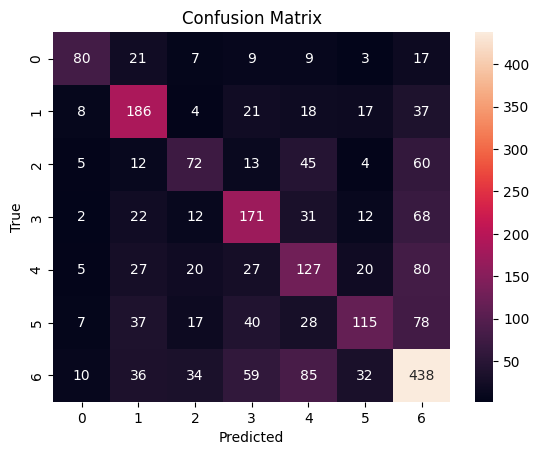

32_32_32_dropout: Validation Accuracy = 0.3033, Validation Loss = 1.8418
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       146
           1       0.00      0.00      0.00       291
           2       0.00      0.00      0.00       211
           3       0.00      0.00      0.00       318
           4       0.00      0.00      0.00       306
           5       0.00      0.00      0.00       322
           6       0.30      1.00      0.47       694

    accuracy                           0.30      2288
   macro avg       0.04      0.14      0.07      2288
weighted avg       0.09      0.30      0.14      2288



/Users/gauravsahoo/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gauravsahoo/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gauravsahoo/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

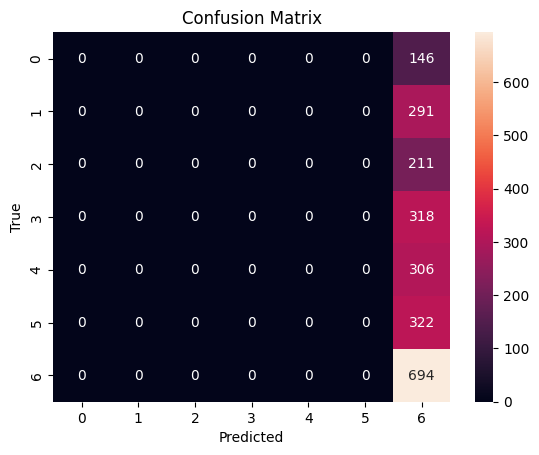

32_32_32_batchnorm: Validation Accuracy = 0.4047, Validation Loss = 1.7528
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
              precision    recall  f1-score   support

           0       0.93      0.09      0.16       146
           1       0.55      0.35      0.42       291
           2       0.80      0.02      0.04       211
           3       0.67      0.13      0.22       318
           4       0.67      0.05      0.09       306
           5       0.72      0.26      0.38       322
           6       0.35      0.96      0.52       694

    accuracy                           0.40      2288
   macro avg       0.67      0.26      0.26      2288
weighted avg       0.59      0.40      0.32      2288



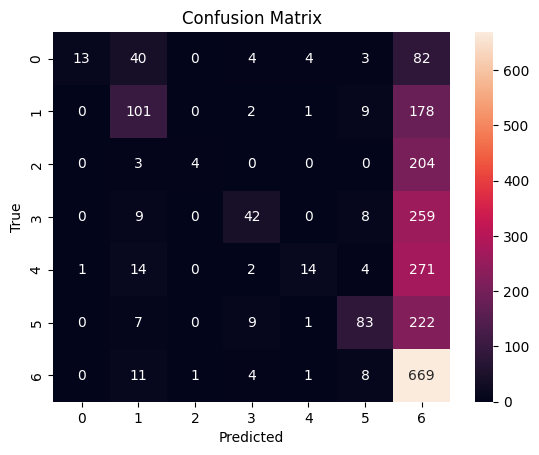

64_64_64_base: Validation Accuracy = 0.4366, Validation Loss = 1.7665
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
              precision    recall  f1-score   support

           0       0.58      0.27      0.37       146
           1       0.61      0.41      0.49       291
           2       0.30      0.15      0.20       211
           3       0.48      0.34      0.40       318
           4       0.49      0.26      0.34       306
           5       0.47      0.26      0.33       322
           6       0.40      0.78      0.53       694

    accuracy                           0.44      2288
   macro avg       0.48      0.35      0.38      2288
weighted avg       0.46      0.44      0.41      2288



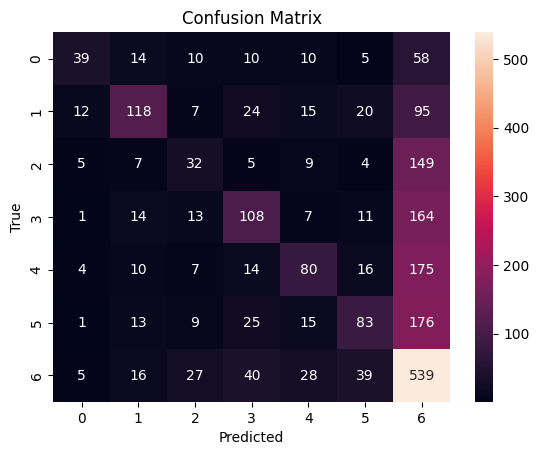

64_64_64_dropout: Validation Accuracy = 0.3619, Validation Loss = 1.7356
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
              precision    recall  f1-score   support

           0       0.60      0.02      0.04       146
           1       0.45      0.22      0.29       291
           2       0.16      0.03      0.05       211
           3       0.58      0.18      0.27       318
           4       0.52      0.14      0.22       306
           5       0.56      0.15      0.24       322
           6       0.33      0.88      0.48       694

    accuracy                           0.36      2288
   macro avg       0.46      0.23      0.23      2288
weighted avg       0.44      0.36      0.29      2288



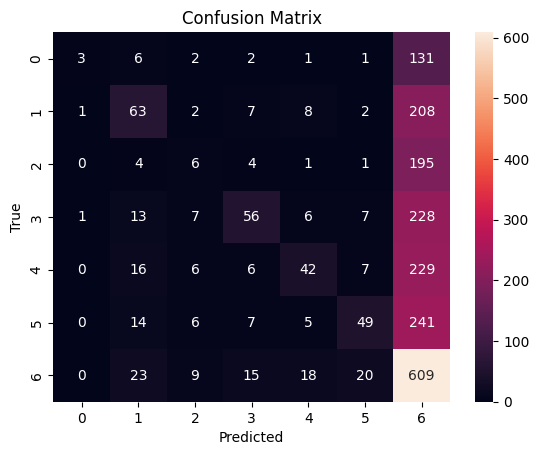

64_64_64_batchnorm: Validation Accuracy = 0.3055, Validation Loss = 1.7304
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       146
           1       0.25      0.00      0.01       291
           2       0.00      0.00      0.00       211
           3       0.25      0.00      0.01       318
           4       1.00      0.03      0.05       306
           5       0.00      0.00      0.00       322
           6       0.30      0.99      0.46       694

    accuracy                           0.31      2288
   macro avg       0.26      0.15      0.08      2288
weighted avg       0.29      0.31      0.15      2288



/Users/gauravsahoo/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gauravsahoo/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gauravsahoo/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

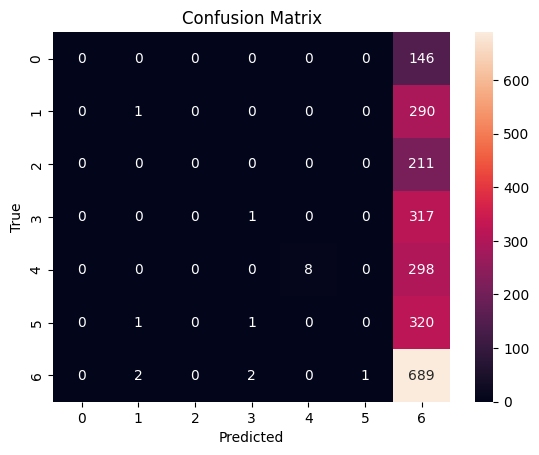

32_64_128_base: Validation Accuracy = 0.4318, Validation Loss = 1.7653
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
              precision    recall  f1-score   support

           0       0.47      0.29      0.36       146
           1       0.51      0.47      0.49       291
           2       0.26      0.15      0.19       211
           3       0.49      0.33      0.40       318
           4       0.41      0.21      0.27       306
           5       0.41      0.29      0.34       322
           6       0.43      0.74      0.54       694

    accuracy                           0.43      2288
   macro avg       0.43      0.35      0.37      2288
weighted avg       0.43      0.43      0.41      2288



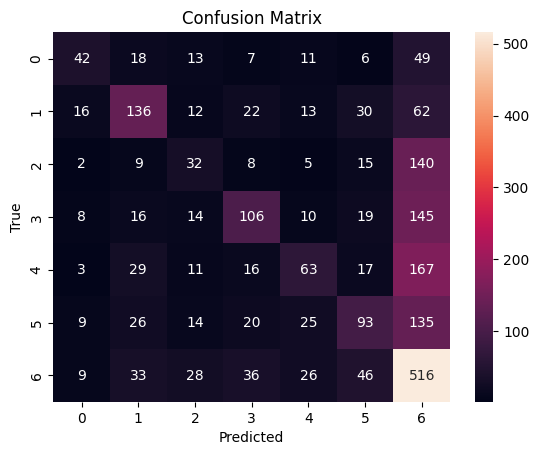

32_64_128_dropout: Validation Accuracy = 0.3361, Validation Loss = 1.7647
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
              precision    recall  f1-score   support

           0       0.80      0.03      0.05       146
           1       0.40      0.03      0.06       291
           2       0.33      0.01      0.02       211
           3       0.56      0.09      0.16       318
           4       0.52      0.11      0.18       306
           5       0.61      0.08      0.15       322
           6       0.32      0.96      0.48       694

    accuracy                           0.34      2288
   macro avg       0.51      0.19      0.16      2288
weighted avg       0.46      0.34      0.22      2288



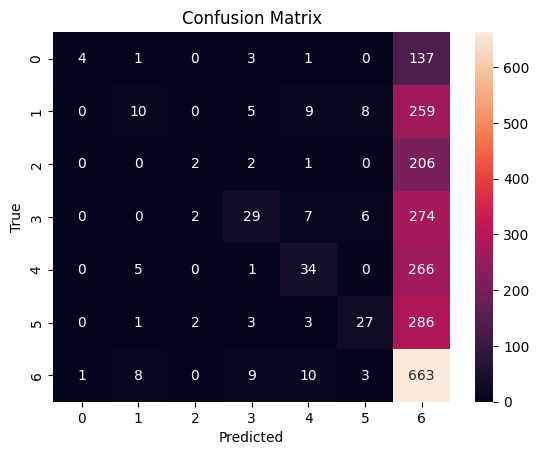

32_64_128_batchnorm: Validation Accuracy = 0.3042, Validation Loss = 1.8400
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       146
           1       0.00      0.00      0.00       291
           2       0.00      0.00      0.00       211
           3       0.00      0.00      0.00       318
           4       1.00      0.01      0.01       306
           5       0.00      0.00      0.00       322
           6       0.30      1.00      0.47       694

    accuracy                           0.30      2288
   macro avg       0.19      0.14      0.07      2288
weighted avg       0.23      0.30      0.14      2288



/Users/gauravsahoo/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gauravsahoo/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/gauravsahoo/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

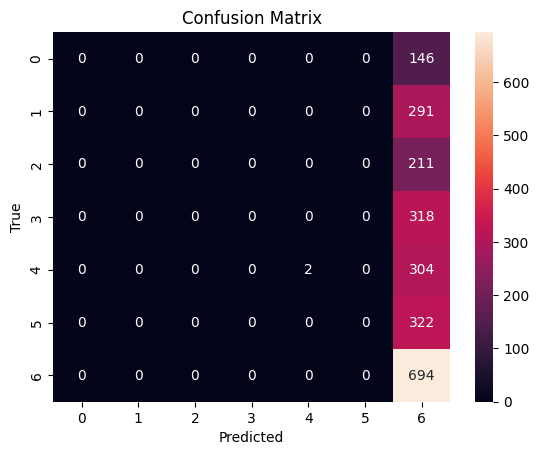

In [ ]:
# Evaluate on the test set; display suitable metrics
def evaluate_model(model):
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    print(f"{name}: Validation Accuracy = {val_accuracy:.4f}, Validation Loss = {val_loss:.4f}")

    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_val, y_pred_classes))

    cm = confusion_matrix(y_val, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

for name, model in models.items():
    evaluate_model(model)

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [15]:
# Define augmentation steps to augment images
# data_augmentation = keras.Sequential([
#     layers.RandomFlip("horizontal_and_vertical"),
#     layers.RandomRotation(0.2),
#     layers.RandomZoom(0.2),
# ])

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [16]:
# Create a function to augment the images
# def augment_images(images):
#     augmented_images = []
#     for image in images:
#         augmented_image = data_augmentation(image)
#         augmented_images.append(augmented_image)
#     return np.array(augmented_images)

In [17]:
# Create the augmented training dataset
# X_train_augmented = augment_images(X_train)

##### **4.1.2**

Train the model on the new augmented dataset.

In [18]:
# Train the model using augmented images
# for name, model in models.items():
#     print(f"Retraining the same model using augmented images: {name}")
#     model.fit(X_train_augmented, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

In [19]:
# Evaluate the model again
# for name, model in models.items():
#     evaluate_model(model)

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

1. '32_32_32_base' achieved the highest accuracy (51.97%) and weighted F1-score (0.52).

2. Dropout after maxpooling degraded the performance for all the filters configurations.

3. Batch normalization too was ineffective, generalizing more towards plastic waste (label 6) due to class imbalance.

4. Moving from 32 to 64 to 128 filters didn’t bring significant improvement. For instance '64_64_64_base' and '32_64_128_base' both hovered around 43–44% accuracy, still underperforming the simpler '32_32_32_base'.

5. Model simplicity outperformed deeper or more complex networks.